In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
from colicoords.cnn.unet import get_unet_256
from colicoords.cnn.preprocess import resize_stack, norm_hampel
from colicoords import iter_subplots
import numpy as np
import tifffile
import os

In [ ]:
data_dir = r'.'

In [2]:
bf_cy3b = tifffile.imread('Cy3B_NHS/Bf_corrected.tif')
bf_egfp = tifffile.imread('eGFP/Bf_corrected.tif')

In [4]:
output = []
wt = 'wts_bf_50-0.121131.h5'
model = get_unet_256(input_shape=(256, 256, 1))
model.load_weights(os.path.join(data_dir, 'wts', wt))

for folder in ['Cy3B_NHS', 'eGFP']:
    bf = tifffile.imread(os.path.join(data_dir, folder, 'Bf_corrected.tif'))
    brightfield_resized = resize_stack(bf, 0.5)
    del bf
    bf_norm = np.stack([norm_hampel(arr) for arr in brightfield_resized])
    prediction = model.predict(np.expand_dims(bf_norm, -1))
    
    predict_resized = resize_stack(prediction.squeeze(), 2)
    out_binary = (predict_resized > 0.5).astype(int)
    
    output.append(out_binary)
    tifffile.imsave(os.path.join(data_dir, folder, 'Binary.tif'), out_binary)

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
mpl.rcParams['xtick.labelbottom'] = False
mpl.rcParams['ytick.labelleft'] = False

We use iter_subplots to check the output:

<IPython.core.display.Javascript object>


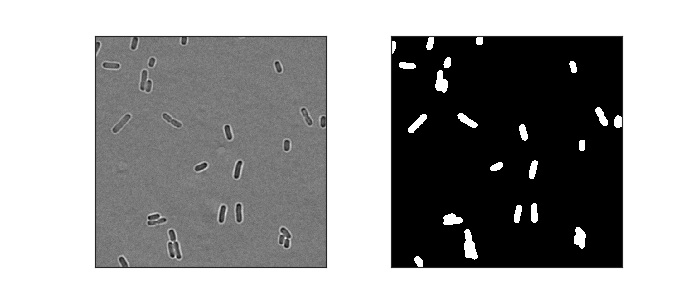

In [12]:
fig, axes = iter_subplots(1, 2, figsize=(7,3))
axes[0].iter_imshow(bf_cy3b, cmap='gray')
axes[1].iter_imshow(output[0],cmap='gray')
fig.display()

<IPython.core.display.Javascript object>


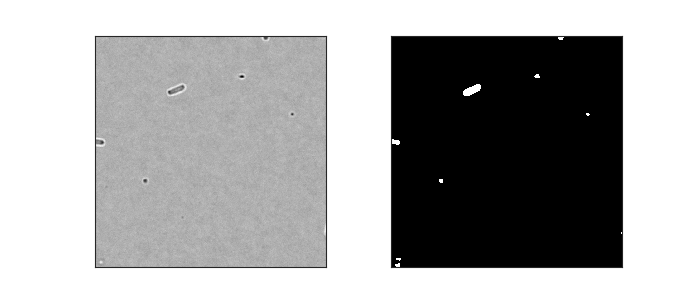

In [13]:
fig, axes = iter_subplots(1, 2, figsize=(7,3))
axes[0].iter_imshow(bf_egfp, cmap='gray')
axes[1].iter_imshow(output[1],cmap='gray')
fig.display()